<h1> TP2 </h1>

In [ ]:
# pip install  pandas matplotlib numpy

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = pd.read_table("ml-100k/u.data", header=None,names=["user_id", "item_id", "rating","timestamps"])
data.shape

(100000, 4)

In [4]:
# preview the data 
data.head()

,user_id,item_id,rating,timestamps
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [130]:
# votes matrix
matrix= data.pivot_table(index=['user_id'],columns=['item_id'],values='rating')
original_matrix = matrix.copy()
matrix.shape

(943, 1682)

In [131]:
matrix

item_id,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
user_id,,,,,,,,,,,,,,,,,,,,,
1,5.0,3.0,4.0,3.0,3.0,5.0,4.0,1.0,5.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,2.0,NaN,NaN,4.0,5.0,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941,5.0,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [132]:
# avrage votes for each user 
matrix['AVG_VOTE_USER']=matrix.mean(axis=1)
matrix['AVG_VOTE_USER']

user_id
1      3.610294
2      3.709677
3      2.796296
4      4.333333
5      2.874286
         ...   
939    4.265306
940    3.457944
941    4.045455
942    4.265823
943    3.410714
Name: AVG_VOTE_USER, Length: 943, dtype: float64

In [133]:
# avrage votes for each item 
matrix.loc['AVG_VOTE_ITEM'] = matrix.mean()
matrix.loc['AVG_VOTE_ITEM']

item_id
1                3.878319
2                3.206107
3                3.033333
4                3.550239
5                3.302326
                   ...   
1679             3.000000
1680             2.000000
1681             3.000000
1682             3.000000
AVG_VOTE_USER    3.588191
Name: AVG_VOTE_ITEM, Length: 1683, dtype: float64

In [134]:
# avrage votes for  user 100
print(f'Avrage votes for user 100 : {matrix.AVG_VOTE_USER[100]}')

Avrage votes for user 100 : 3.0677966101694913


In [135]:
# avrage votes for movie 53
print(f'Avrage votes for movie 53 : { matrix.loc["AVG_VOTE_ITEM"][53] }')

Avrage votes for movie 53 : 2.953125


In [136]:
# number of votes made by every user
matrix['NBR_VOTES_USER']=(matrix>0).sum(axis=1)-1
matrix['NBR_VOTES_USER']

user_id
1                 272
2                  62
3                  54
4                  24
5                 175
                 ... 
940               107
941                22
942                79
943               168
AVG_VOTE_ITEM    1682
Name: NBR_VOTES_USER, Length: 944, dtype: int64

In [137]:
# most and least number of votes by user
print(f'The most number of votes  made by a user')
matrix.loc[ matrix["NBR_VOTES_USER"]==matrix["NBR_VOTES_USER"][:-1].max(),['NBR_VOTES_USER']]


The most number of votes  made by a user


item_id,NBR_VOTES_USER
user_id,
405,737


In [138]:
print(f'The least number of votes  made by a user')
matrix.loc[matrix["NBR_VOTES_USER"]==matrix["NBR_VOTES_USER"][:-1].min(),['NBR_VOTES_USER']]

The least number of votes  made by a user


item_id,NBR_VOTES_USER
user_id,
19,20
34,20
36,20
93,20
143,20
147,20
166,20
202,20
242,20


In [139]:
# number of votes for each item 
matrix.loc['NBR_VOTES_ITEM']=(matrix>0).sum(axis=0)-1
matrix.loc['NBR_VOTES_ITEM']

item_id
1                 452.0
2                 131.0
3                  90.0
4                 209.0
5                  86.0
                  ...  
1680                1.0
1681                1.0
1682                1.0
AVG_VOTE_USER     943.0
NBR_VOTES_USER    943.0
Name: NBR_VOTES_ITEM, Length: 1684, dtype: float64

In [140]:
# most and least number of votes by movie
print(f'The most number of votes  made for a movie:')
items = matrix.loc['NBR_VOTES_ITEM'] == matrix.loc['NBR_VOTES_ITEM'][:-2].max()
items[items == True].index.tolist()

The most number of votes  made for a movie:


[50]

In [141]:
print(f'The least number of votes for a movie: ')
items = matrix.loc['NBR_VOTES_ITEM'] == matrix.loc['NBR_VOTES_ITEM'][:-2].min()
items[items == True].index.tolist()

The least number of votes for a movie: 


[599,
 677,
 711,
 814,
 830,
 852,
 857,
 1122,
 1130,
 1156,
 1201,
 1235,
 1236,
 1309,
 1310,
 1320,
 1325,
 1329,
 1339,
 1340,
 1341,
 1343,
 1348,
 1349,
 1352,
 1363,
 1364,
 1366,
 1373,
 1414,
 1447,
 1452,
 1453,
 1457,
 1458,
 1460,
 1461,
 1476,
 1482,
 1486,
 1492,
 1493,
 1494,
 1498,
 1505,
 1507,
 1510,
 1515,
 1520,
 1525,
 1526,
 1533,
 1536,
 1543,
 1546,
 1548,
 1557,
 1559,
 1561,
 1562,
 1563,
 1564,
 1565,
 1566,
 1567,
 1568,
 1569,
 1570,
 1571,
 1572,
 1574,
 1575,
 1576,
 1577,
 1579,
 1580,
 1581,
 1582,
 1583,
 1584,
 1586,
 1587,
 1593,
 1595,
 1596,
 1599,
 1601,
 1603,
 1604,
 1606,
 1613,
 1614,
 1616,
 1618,
 1619,
 1621,
 1624,
 1625,
 1626,
 1627,
 1630,
 1632,
 1633,
 1634,
 1635,
 1636,
 1637,
 1638,
 1640,
 1641,
 1645,
 1647,
 1648,
 1649,
 1650,
 1651,
 1653,
 1654,
 1655,
 1657,
 1659,
 1660,
 1661,
 1663,
 1665,
 1666,
 1667,
 1668,
 1669,
 1670,
 1671,
 1673,
 1674,
 1675,
 1676,
 1677,
 1678,
 1679,
 1680,
 1681,
 1682]

In [145]:
# THE % OF EMPTY COLUMN FOR EACH ROW
(original_matrix.isna().sum() / original_matrix.shape[0])

item_id
1       0.520679
2       0.861082
3       0.904560
4       0.778367
5       0.908802
          ...   
1678    0.998940
1679    0.998940
1680    0.998940
1681    0.998940
1682    0.998940
Length: 1682, dtype: float64

In [149]:
# THE % OF EMPTY COLUMN IN TOTALE
print(f'The % of empty column in totale is : % {(original_matrix.isna().sum() / original_matrix.shape[0]).sum()/ original_matrix.shape[1]}')

The % of empty column in totale is : % 0.9369533063577545


Text(0, 0.5, 'users')

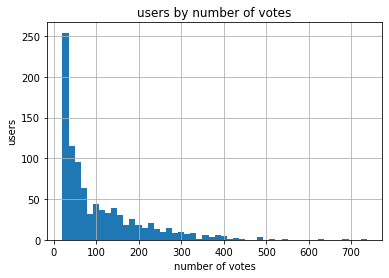

In [154]:
hist = matrix['NBR_VOTES_USER'][:-2].hist(bins=50)
hist.set_title('users by number of votes')
hist.set_xlabel('number of votes')
hist.set_ylabel('users')


In [157]:
df_user =open("ml-100k/u.user")
user_data = pd.read_csv(df_user, sep="|",names=["user_id","age", "gender", "occupation", "zip code"])
user_data.head()

,user_id,age,gender,occupation,zip code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [158]:
full_data =pd.merge(data,user_data,on='user_id').sort_values('user_id')
full_data

,user_id,item_id,rating,timestamps,age,gender,occupation,zip code
20397,1,61,4,878542420,24,M,technician,85711
20558,1,270,5,888732827,24,M,technician,85711
20557,1,40,3,876893230,24,M,technician,85711
20556,1,211,3,878541970,24,M,technician,85711
20555,1,141,3,878542608,24,M,technician,85711
...,...,...,...,...,...,...,...,...
99587,943,559,4,888639638,22,M,student,77841
99588,943,121,3,875502096,22,M,student,77841
99589,943,402,2,888639702,22,M,student,77841
99581,943,720,1,888640048,22,M,student,77841


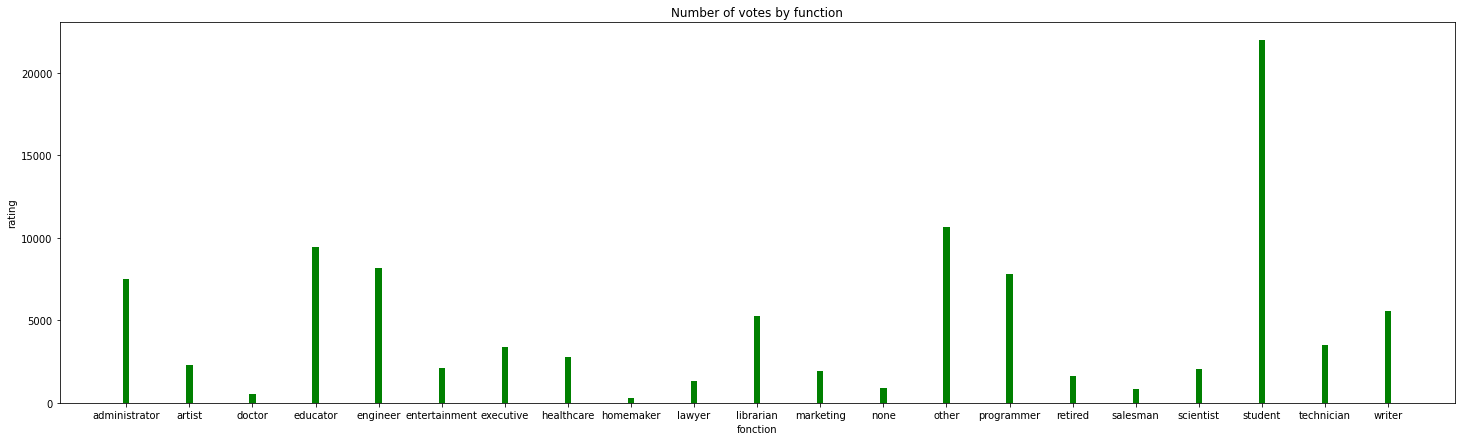

In [162]:
data_=full_data.groupby('occupation').rating.count()
m=data_.reset_index().rename(columns={full_data.index.name:'rating'})
f=plt.figure(figsize=(25,7))
plt.bar(m.occupation,m.rating,color='green',width=0.1)
plt.xlabel('fonction')
plt.ylabel('rating')
plt.title('Number of votes by function')
plt.show()

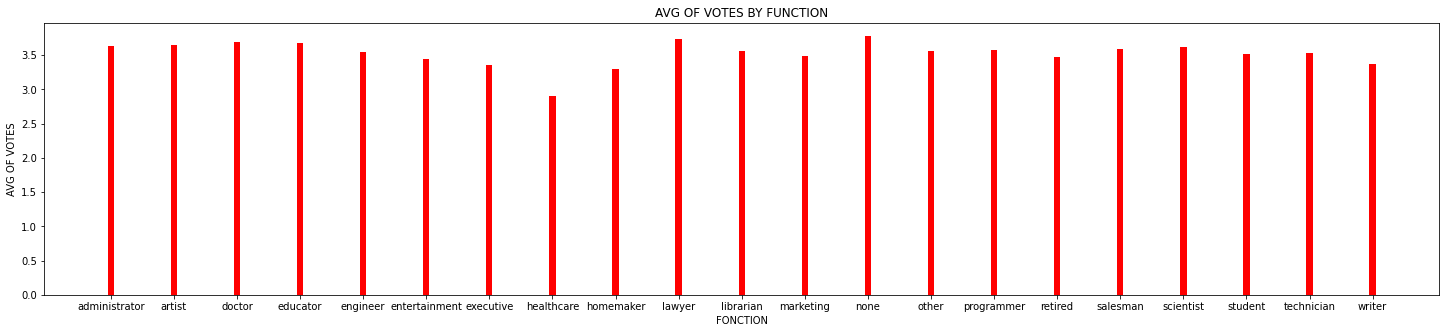

In [165]:
d=full_data.groupby('occupation').rating.mean()
m=d.reset_index().rename(columns={full_data.index.name:'mean rating'})
f=plt.figure(figsize=(25,5))
plt.bar(m.occupation,m.rating,color='red',width=0.1)
plt.xlabel('FONCTION')
plt.ylabel('AVG OF VOTES')
plt.title('AVG OF VOTES BY FUNCTION')
plt.show()


<h1> TP3 </h1>

In [169]:
mx = original_matrix.fillna(0)
def standardize(row):
    new_row = (row - row.mean()) / (row.max() - row.min())
    return (new_row)
     
mx = mx.apply(standardize)
mx


item_id,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
user_id,,,,,,,,,,,,,,,,,,,,,
1,0.628208,0.510923,0.7421,0.44263,0.539767,0.980276,0.484199,0.014422,0.752916,0.527678,...,-0.00106,-0.00106,-0.00106,-0.00106,-0.00106,-0.00106,-0.00106,-0.00106,-0.00106,-0.00106
2,0.428208,-0.089077,-0.0579,-0.15737,-0.060233,-0.019724,-0.315801,-0.185578,-0.247084,0.327678,...,-0.00106,-0.00106,-0.00106,-0.00106,-0.00106,-0.00106,-0.00106,-0.00106,-0.00106,-0.00106
3,-0.371792,-0.089077,-0.0579,-0.15737,-0.060233,-0.019724,-0.315801,-0.185578,-0.247084,-0.072322,...,-0.00106,-0.00106,-0.00106,-0.00106,-0.00106,-0.00106,-0.00106,-0.00106,-0.00106,-0.00106
4,-0.371792,-0.089077,-0.0579,-0.15737,-0.060233,-0.019724,-0.315801,-0.185578,-0.247084,-0.072322,...,-0.00106,-0.00106,-0.00106,-0.00106,-0.00106,-0.00106,-0.00106,-0.00106,-0.00106,-0.00106
5,0.428208,0.510923,-0.0579,-0.15737,-0.060233,-0.019724,-0.315801,-0.185578,-0.247084,-0.072322,...,-0.00106,-0.00106,-0.00106,-0.00106,-0.00106,-0.00106,-0.00106,-0.00106,-0.00106,-0.00106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,-0.371792,-0.089077,-0.0579,-0.15737,-0.060233,-0.019724,-0.315801,-0.185578,0.752916,-0.072322,...,-0.00106,-0.00106,-0.00106,-0.00106,-0.00106,-0.00106,-0.00106,-0.00106,-0.00106,-0.00106
940,-0.371792,-0.089077,-0.0579,0.24263,-0.060233,-0.019724,0.484199,0.814422,0.352916,-0.072322,...,-0.00106,-0.00106,-0.00106,-0.00106,-0.00106,-0.00106,-0.00106,-0.00106,-0.00106,-0.00106
941,0.628208,-0.089077,-0.0579,-0.15737,-0.060233,-0.019724,0.484199,-0.185578,-0.247084,-0.072322,...,-0.00106,-0.00106,-0.00106,-0.00106,-0.00106,-0.00106,-0.00106,-0.00106,-0.00106,-0.00106


In [174]:
user_similarity_matrix= mx.corr(method='pearson',min_periods=7)
user_similarity_matrix=pd.DataFrame(user_similarity_matrix,index=mx.index, columns=mx.index)
user_similarity_matrix[user_similarity_matrix< 0] = 0
user_similarity_matrix

user_id,1,2,3,4,5,6,7,8,9,10,...,934,935,936,937,938,939,940,941,942,943
user_id,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.234595,0.193362,0.226213,0.128840,0.015113,0.347354,0.254490,0.209502,0.104655,...,0.177778,0.034234,0.038096,0.000000,0.000000,0.144717,0.110913,0.118416,0.131030,0.087249
2,0.234595,1.000000,0.190649,0.409044,0.240712,0.030062,0.220022,0.206020,0.077894,0.072906,...,0.109469,0.000000,0.020944,0.000000,0.000000,0.237575,0.261943,0.263198,0.190375,0.184814
3,0.193362,0.190649,1.000000,0.227849,0.141368,0.065347,0.258855,0.078636,0.146181,0.079608,...,0.044390,0.080215,0.026230,0.000000,0.000000,0.177585,0.262461,0.135573,0.082063,0.302821
4,0.226213,0.409044,0.227849,1.000000,0.237298,0.021878,0.295489,0.352800,0.229922,0.138220,...,0.057858,0.000000,0.047670,0.000000,0.000000,0.301222,0.248113,0.229866,0.234365,0.251201
5,0.128840,0.240712,0.141368,0.237298,1.000000,0.000000,0.205289,0.145866,0.142541,0.000000,...,0.118839,0.000000,0.000000,0.000000,0.000000,0.323203,0.159949,0.179454,0.177302,0.212719
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,0.144717,0.237575,0.177585,0.301222,0.323203,0.016468,0.173634,0.145564,0.183288,0.016126,...,0.152261,0.015068,0.045249,0.000000,0.000000,1.000000,0.133692,0.231712,0.292645,0.171254
940,0.110913,0.261943,0.262461,0.248113,0.159949,0.000000,0.154478,0.078550,0.000000,0.035690,...,0.038153,0.000000,0.000000,0.000000,0.000000,0.133692,1.000000,0.143897,0.073872,0.198447
941,0.118416,0.263198,0.135573,0.229866,0.179454,0.000000,0.045889,0.093466,0.064495,0.000000,...,0.137369,0.000000,0.016715,0.000000,0.021981,0.231712,0.143897,1.000000,0.125911,0.129064


In [175]:
def display_top_k(k,similarity_matrix):
    for r in  range(len(similarity_matrix)):
        user = similarity_matrix.iloc[r]
        print(f'## USER {r+1} ##')
        print('___________________')
        for us in user.sort_values()[-k-1:][::-1][1:].index:
            print(f'- User {us}  | similarity {similarity_matrix.iloc[r][us]}')
        print('___________________')

In [176]:
display_top_k(3,user_similarity_matrix)

## USER 1 ##
___________________
- User 50  | similarity 0.45767718539145075
- User 121  | similarity 0.454544338780783
- User 117  | similarity 0.43178877749121264
___________________
## USER 2 ##
___________________
- User 233  | similarity 0.6114944089312374
- User 576  | similarity 0.5558605216919046
- User 161  | similarity 0.5534833039523931
___________________
## USER 3 ##
___________________
- User 410  | similarity 0.3860595104519614
- User 763  | similarity 0.37931795482218156
- User 42  | similarity 0.3545245524322826
___________________
## USER 4 ##
___________________
- User 56  | similarity 0.5274289370003101
- User 202  | similarity 0.5022965743080475
- User 204  | similarity 0.5012505662872704
___________________
## USER 5 ##
___________________
- User 218  | similarity 0.4910336433096922
- User 219  | similarity 0.41940513567092724
- User 54  | similarity 0.4182554799228359
___________________
## USER 6 ##
___________________
- User 766  | similarity 0.2721222952902269

- User 559  | similarity 0.5393802090311212
- User 219  | similarity 0.53894182002808
- User 234  | similarity 0.5190054654959851
___________________
## USER 219 ##
___________________
- User 672  | similarity 0.6255362104179646
- User 559  | similarity 0.5819782197897998
- User 436  | similarity 0.5568289342630752
___________________
## USER 220 ##
___________________
- User 476  | similarity 0.39696938652365604
- User 815  | similarity 0.3145023567337108
- User 846  | similarity 0.30849640855234917
___________________
## USER 221 ##
___________________
- User 137  | similarity 0.3993931986180743
- User 285  | similarity 0.37793274724070913
- User 124  | similarity 0.3777400300111117
___________________
## USER 222 ##
___________________
- User 228  | similarity 0.49346784322447446
- User 121  | similarity 0.4803357351490335
- User 230  | similarity 0.45991530423835975
___________________
## USER 223 ##
___________________
- User 58  | similarity 0.39774228710042614
- User 69  | simil

- User 219  | similarity 0.5496715899450567
- User 448  | similarity 0.5488272108830767
- User 218  | similarity 0.5022164392827488
___________________
## USER 448 ##
___________________
- User 447  | similarity 0.5488272108830767
- User 219  | similarity 0.5471982380617311
- User 436  | similarity 0.4864313016351407
___________________
## USER 449 ##
___________________
- User 229  | similarity 0.6750417567431686
- User 227  | similarity 0.624432241215068
- User 230  | similarity 0.6140927008762826
___________________
## USER 450 ##
___________________
- User 449  | similarity 0.5786053037446647
- User 227  | similarity 0.5164891033213916
- User 229  | similarity 0.5075630909975712
___________________
## USER 451 ##
___________________
- User 393  | similarity 0.5466329660564754
- User 88  | similarity 0.5429371968182403
- User 739  | similarity 0.5267069559701888
___________________
## USER 452 ##
___________________
- User 379  | similarity 0.4736777290149237
- User 563  | similarit

- User 803  | similarity 0.4156249769415288
- User 4  | similarity 0.3552905482091963
- User 233  | similarity 0.3179481933006734
___________________
## USER 687 ##
___________________
- User 243  | similarity 0.35642831167131594
- User 259  | similarity 0.264504866809923
- User 342  | similarity 0.2542541259943982
___________________
## USER 688 ##
___________________
- User 263  | similarity 0.2973569159136946
- User 681  | similarity 0.28226928498499815
- User 877  | similarity 0.279522883129492
___________________
## USER 689 ##
___________________
- User 879  | similarity 0.3212115573155572
- User 316  | similarity 0.28079415177262584
- User 754  | similarity 0.27640297507445083
___________________
## USER 690 ##
___________________
- User 750  | similarity 0.3678515957482269
- User 310  | similarity 0.3431986159790482
- User 938  | similarity 0.31567651171362165
___________________
## USER 691 ##
___________________
- User 750  | similarity 0.27984732741187357
- User 852  | simil

- User 105  | similarity 0.3986077134126557
- User 826  | similarity 0.3607733066724123
- User 472  | similarity 0.3529015584155485
___________________
## USER 927 ##
___________________
- User 913  | similarity 0.35386791733534256
- User 867  | similarity 0.33816566912832663
- User 782  | similarity 0.29305756624506596
___________________
## USER 928 ##
___________________
- User 411  | similarity 0.4001744810329657
- User 406  | similarity 0.37863284026357985
- User 123  | similarity 0.3697475744831099
___________________
## USER 929 ##
___________________
- User 477  | similarity 0.3026618654995547
- User 932  | similarity 0.2760129978070524
- User 819  | similarity 0.26877962086347695
___________________
## USER 930 ##
___________________
- User 472  | similarity 0.4161993484045908
- User 597  | similarity 0.3822024905616147
- User 831  | similarity 0.38004748716966474
___________________
## USER 931 ##
___________________
- User 252  | similarity 0.31084377341515534
- User 368  | 